In [2]:
from tensorflow.examples.tutorials.mnist import input_data 
import tensorflow as tf 
import numpy as np 
mnist=input_data.read_data_sets('fashion-mnist/',one_hot=True)  
x,y=tf.placeholder(tf.float32,shape=[None,784],name="input_x"),tf.placeholder(tf.float32,shape=[None,10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion-mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting fashion-mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting fashion-mnist/t10k-images-idx3-ubyte.gz
Extracting fashion-mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 全连接层实现

In [10]:
w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
y_hat=tf.nn.softmax(tf.matmul(x,w)+b,name="output_y")
loss=-tf.reduce_mean(y*tf.log(y_hat))
trainer=tf.train.GradientDescentOptimizer(.01).minimize(loss)
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(1000):
    batch=mnist.train.next_batch(80)
    _,los=sess.run([trainer,loss],feed_dict={x:batch[0],y:batch[1]})
    if i%200==0:
        print(f"{i}: {los}")
pred=tf.equal(tf.argmax(y,1),tf.argmax(y_hat,1))
accuracy=tf.reduce_mean(tf.cast(pred,'float'))
print(accuracy.eval(feed_dict={x:mnist.test.images,y:mnist.test.labels})) 
# ---------预测-------------
tf.train.Saver().save(sess, save_path='./mnist_model/mnist_model.ckpt')
plan=tf.argmax(y_hat,axis=1)
print(plan.eval(feed_dict={x:mnist.test.images})) 
# --------------------------
sess.close()

0: 0.2302585393190384
200: 0.21224364638328552
400: 0.19491058588027954
600: 0.18539945781230927
800: 0.1670871376991272
0.7908
[7 2 1 ... 4 8 6]


### CNN实现

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(60, 784)
(60, 3136)
(60, 784)
(60, 3136)
(60, 784)
(60, 3136)
(60, 784)
(60, 3136)
(60, 784)
(60, 3136)


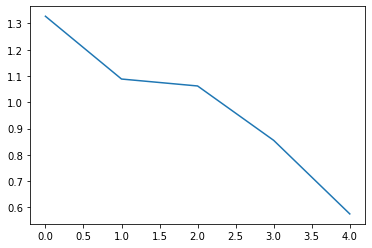

0.2023


In [3]:
def weight_var(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=.1))
def bias_var(shape):
    return tf.Variable(tf.zeros(shape))
def conv2d(x,w):
    return tf.nn.conv2d(x,w,strides=2,padding='SAME')
def max_pool(x):
    return tf.nn.max_pool(x,ksize=3,strides=1,padding='SAME')


sess=tf.InteractiveSession() 
w_conv1=weight_var([5,5,1,32])
b_conv1=bias_var([32])
x_images=tf.reshape(x,[-1,28,28,1])
h_conv1=tf.nn.relu(conv2d(x_images,w_conv1)+b_conv1)
h_pool1=max_pool(h_conv1)

w_conv2=weight_var([5,5,32,64])
b_conv2=bias_var([64])
h_conv2=tf.nn.relu(conv2d(h_pool1,w_conv2)+b_conv2)
h_pool2=max_pool(h_conv2)
# 全连接层 
features=int(np.prod(h_pool2.shape[1:]))
w_fc1=weight_var([features,1024])
b_fc1=bias_var([1024])
h_pool2_flat=tf.reshape(h_pool2,[-1,features])
h_fc1=tf.nn.relu(tf.matmul(h_pool2_flat,w_fc1)+b_fc1)

# keep_prob=tf.placeholder('float')
keep_prob=.4 
h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)

w_fc2=weight_var([1024,10])
b_fc2=bias_var([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop,w_fc2)+b_fc2,name="output_y")


cross_entropy =-tf.reduce_mean(y*tf.log(y_conv))

trainer=tf.train.AdamOptimizer().minimize(cross_entropy)
# sess=tf.InteractiveSession() 
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())
costs=[]
for i in range(5):
    batch=mnist.train.next_batch(60)
    print(batch[0].shape )
    _,cost,mypoo=sess.run([trainer,cross_entropy,h_pool2_flat],feed_dict={x:batch[0],y:batch[1]})
    costs+=[cost]
    print(mypoo.shape)
from matplotlib import pyplot as plt 
plt.plot(costs)
plt.show()
accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(y_conv,1)),'float'))
print(accuracy.eval(feed_dict={x:mnist.test.images,y:mnist.test.labels}))

In [7]:
tf.train.Saver().save(sess, save_path='./mnist_model/mnist_model.ckpt')

'./mnist_model/mnist_model.ckpt'

In [121]:
mnist.test.images.shape

(10000, 784)

In [6]:
accuracy=tf.argmax(y_conv,1)
v=accuracy.eval(feed_dict={x:mnist.test.images})
v 

array([4, 0, 1, ..., 6, 7, 0], dtype=int64)

In [123]:
sess.close()